In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import numpy as np

In [2]:
we_go = pd.read_csv('../data/partner_project_data.csv')

In [3]:
wego = we_go

In [4]:
wego['SCHEDULED_TIME'] = pd.to_datetime(wego['SCHEDULED_TIME'])

In [5]:
wego['hour']= wego['SCHEDULED_TIME'].dt.hour

In [12]:
wego['day']= wego['SCHEDULED_TIME'].dt.day_name()

In [13]:
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 24:
        return 'Evening'
    else:
        return 'Nightime'

In [14]:
wego['time_of_day'] = wego['hour'].apply(categorize_hour)

In [16]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   CALENDAR_ID                350329 non-null  int64         
 1   SERVICE_ABBR               350329 non-null  int64         
 2   ADHERENCE_ID               350329 non-null  int64         
 3   DATE                       350329 non-null  object        
 4   ROUTE_ABBR                 350329 non-null  int64         
 5   BLOCK_ABBR                 350329 non-null  int64         
 6   OPERATOR                   350329 non-null  int64         
 7   TRIP_ID                    350329 non-null  int64         
 8   OVERLOAD_ID                350329 non-null  int64         
 9   ROUTE_DIRECTION_NAME       350329 non-null  object        
 10  TIME_POINT_ABBR            350329 non-null  object        
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64 

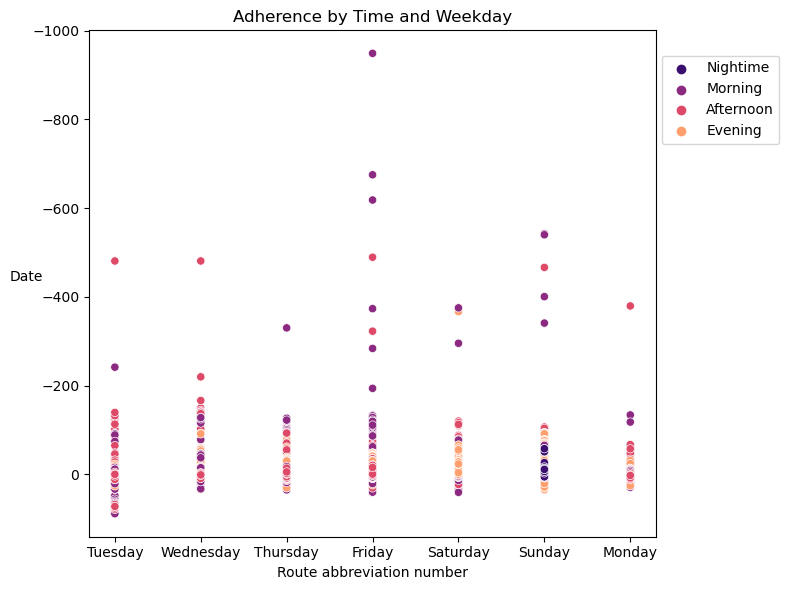

In [21]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=wego,
                     x='day',
                     y='ADHERENCE',
                     hue='time_of_day',
                     palette='magma')
ax.set_xlabel('Route abbreviation number')
ax.set_ylabel('Date', rotation=0)
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1.01, .95), loc='upper left', borderaxespad=0.)

plt.title('Adherence by Time and Weekday')
plt.tight_layout()
#plt.savefig('route_late_by_datetimes')
plt.show()

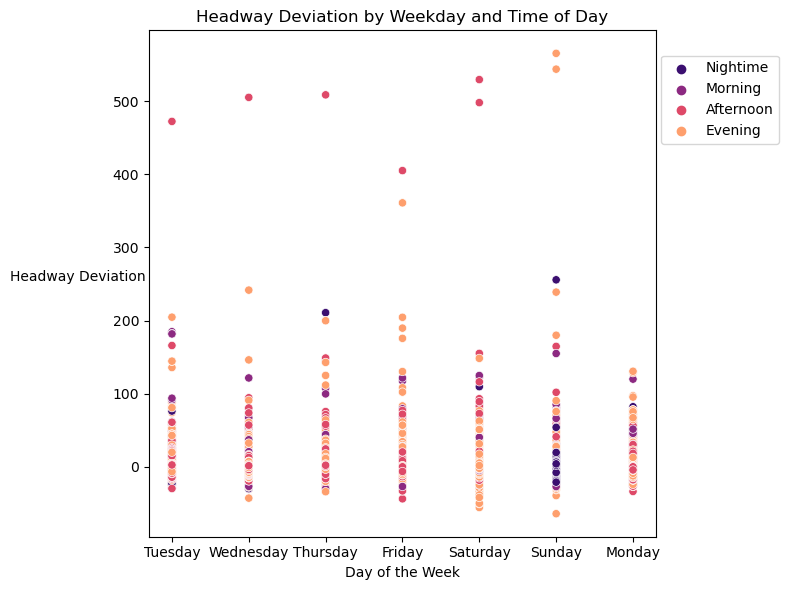

In [29]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=wego,
                     x='day',
                     y='HDWY_DEV',
                     hue='time_of_day',
                     palette='magma')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Headway Deviation', rotation=0, labelpad= 25)
plt.legend(bbox_to_anchor=(1.01, .95), loc='upper left', borderaxespad=0.)

plt.title('Headway Deviation by Weekday and Time of Day')
plt.tight_layout()
#plt.savefig('route_late_by_datetimes')
plt.show()

In [37]:
wego['HDWY_DEV'].value_counts()

HDWY_DEV
 0.000000     760
 0.016666     699
-0.100000     660
-0.016667     640
-0.116667     619
             ... 
 25.366666      1
 55.966666      1
 41.933333      1
-23.516667      1
-17.500000      1
Name: count, Length: 4217, dtype: int64

In [35]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   CALENDAR_ID                350329 non-null  int64         
 1   SERVICE_ABBR               350329 non-null  int64         
 2   ADHERENCE_ID               350329 non-null  int64         
 3   DATE                       350329 non-null  object        
 4   ROUTE_ABBR                 350329 non-null  int64         
 5   BLOCK_ABBR                 350329 non-null  int64         
 6   OPERATOR                   350329 non-null  int64         
 7   TRIP_ID                    350329 non-null  int64         
 8   OVERLOAD_ID                350329 non-null  int64         
 9   ROUTE_DIRECTION_NAME       350329 non-null  object        
 10  TIME_POINT_ABBR            350329 non-null  object        
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64 

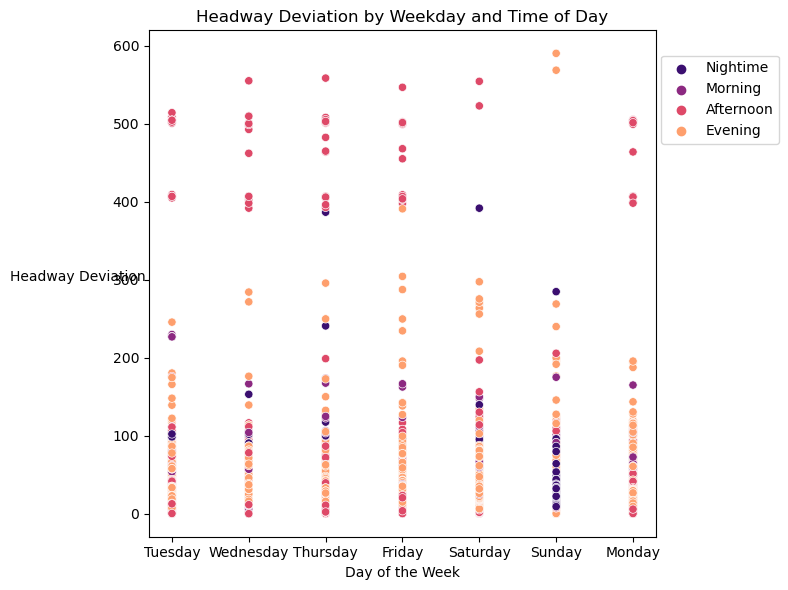

In [40]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=wego,
                     x='day',
                     y='ACTUAL_HDWY',
                     hue='time_of_day',
                     palette='magma')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Headway Deviation', rotation=0, labelpad= 25)
plt.legend(bbox_to_anchor=(1.01, .95), loc='upper left', borderaxespad=0.)

plt.title('Headway Deviation by Weekday and Time of Day')
plt.tight_layout()
#plt.savefig('route_late_by_datetimes')
plt.show()